In [200]:
import pandas as pd
import numpy as np
from sklearn.lda import LDA
from geopy.distance import vincenty
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [201]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier, BaggingClassifier
from sklearn import svm
from sklearn.grid_search import GridSearchCV

In [202]:
df = pd.read_csv("../assets/train.csv")
test = pd.read_csv("../assets/test.csv")
sample = pd.read_csv('../Assets/sampleSubmission.csv')

In [203]:
df.head(2)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0


In [204]:
df["Date"] = pd.to_datetime(df["Date"])
test["Date"] = pd.to_datetime(test["Date"])

In [205]:
df["Latlong"] = zip(df["Latitude"], df["Longitude"])
test["Latlong"] = zip(test["Latitude"], test["Longitude"])

In [206]:
#Station 1: CHICAGO O'HARE INTERNATIONAL AIRPORT Lat: 41.995 Lon: -87.933 Elev: 662 ft. above sea level
#Station 2: CHICAGO MIDWAY INTL ARPT Lat: 41.786 Lon: -87.752 Elev: 612 ft. above sea level

station_1 = (41.995, -87.933)
station_2 = (41.786, -87.752)

print(vincenty(station_1, station_2).miles)

17.1810367501


In [207]:
def checkDistance(x):
    if vincenty(station_1,x).miles > vincenty(station_2,x).miles:
        return 2
    else:
        return 1

In [208]:
df["Station"] = df["Latlong"].apply(checkDistance)
test["Station"] = test["Latlong"].apply(checkDistance)

In [209]:
weather = pd.read_csv("../assets/weather.csv")

In [79]:
weather_st1 = weather[weather["Station"]==1]
weather_st1.drop("Station",axis=1,inplace=True)
weather_st2 = weather[weather["Station"]==2]
weather_st2.drop("Station",axis=1,inplace=True)
weather = weather_st1.merge(weather_st2,on="Date")

/Users/Sheena/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/Sheena/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [210]:
weather["Date"] = pd.to_datetime(weather["Date"])

In [211]:
df3 = df.merge(weather,on=["Date","Station"])
test3 = test.merge(weather,on=["Date","Station"])

In [212]:
def replaceNulls(x):
    if (x == "M") | (x==" ") | (x=="-"):
        return np.nan
    else:
        return x

In [213]:
df3 = df3.applymap(replaceNulls)
test3 = test3.applymap(replaceNulls)

In [214]:
df3.drop(["Depart","Depth","SnowFall","Water1","CodeSum","WetBulb","PrecipTotal","StnPressure"],axis=1, inplace=True)
test3.drop(["Depart","Depth","SnowFall","Water1","CodeSum","WetBulb","PrecipTotal","StnPressure"],axis=1, inplace=True)

In [215]:
weather.drop(["Depart","Depth","SnowFall","Water1","CodeSum","WetBulb","PrecipTotal","StnPressure"],axis=1, inplace=True)

In [216]:
def replaceTrace(x):
    if (x == "T"):
        return .00001
    else:
        return x

In [217]:
df3 = df3.applymap(replaceTrace).copy(deep=True)
test=test3.applymap(replaceTrace).copy(deep=True)

In [27]:
#df3.drop("NumMosquitos",axis=1,inplace=True)

In [218]:
df4 = df3.sort_values(by="Date").ffill().copy(deep=True)
test4 = test.sort_values(by="Date").ffill().copy(deep=True)

In [22]:
df2007 = df4[df4.Date.dt.year == 2007]
df2009 = df4[df4.Date.dt.year == 2009]
df2011 = df4[df4.Date.dt.year == 2011]
df2013 = df4[df4.Date.dt.year == 2013]

In [23]:
df2008 = test4[test4.Date.dt.year == 2008]
df2010 = test4[test4.Date.dt.year == 2010]
df2012 = test4[test4.Date.dt.year == 2012]
df2014 = test4[test4.Date.dt.year == 2014]

In [83]:
df5 = df4[x_list].apply(lambda x: pd.to_numeric(x))

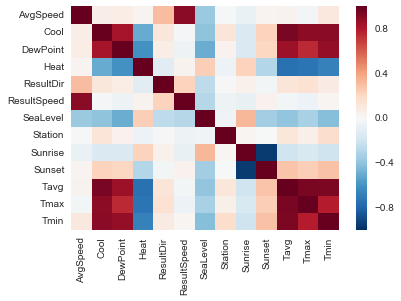

In [85]:
sns.heatmap(df5.corr())

In [61]:
weather_list = ["AvgSpeed","Tavg","Heat","ResultDir","SeaLevel","Station","Sunrise","Sunset","Longitude","Latitude","NumMosquitos"]

In [219]:
df4.columns

Index([u'Date', u'Address', u'Species', u'Block', u'Street', u'Trap',
       u'AddressNumberAndStreet', u'Latitude', u'Longitude',
       u'AddressAccuracy', u'NumMosquitos', u'WnvPresent', u'Latlong',
       u'Station', u'Tmax', u'Tmin', u'Tavg', u'DewPoint', u'Heat', u'Cool',
       u'Sunrise', u'Sunset', u'SeaLevel', u'ResultSpeed', u'ResultDir',
       u'AvgSpeed'],
      dtype='object')

In [221]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(list(df4["Species"].values) + list(test4["Species"].values))

LabelEncoder()

In [220]:
test4.columns

Index([u'Id', u'Date', u'Address', u'Species', u'Block', u'Street', u'Trap',
       u'AddressNumberAndStreet', u'Latitude', u'Longitude',
       u'AddressAccuracy', u'Latlong', u'Station', u'Tmax', u'Tmin', u'Tavg',
       u'DewPoint', u'Heat', u'Cool', u'Sunrise', u'Sunset', u'SeaLevel',
       u'ResultSpeed', u'ResultDir', u'AvgSpeed'],
      dtype='object')

In [222]:
df4["Species"] = le.transform(df4["Species"].values)
test4["Species"] = le.transform(test4["Species"].values)

In [223]:
le.fit(list(df4["Trap"].values) + list(test4["Trap"].values))
df4["Trap"] = le.transform(df4["Trap"].values)
test4["Trap"] = le.transform(test4["Trap"].values)

In [224]:
le.fit(list(df4["Street"].values) + list(test4["Street"].values))
df4["Street"] = le.transform(df4["Street"].values)
test4["Street"] = le.transform(test4["Street"].values)

In [225]:
df5 = df4.copy()

In [226]:
test5 = test4.copy()

In [227]:
test5.columns

Index([u'Id', u'Date', u'Address', u'Species', u'Block', u'Street', u'Trap',
       u'AddressNumberAndStreet', u'Latitude', u'Longitude',
       u'AddressAccuracy', u'Latlong', u'Station', u'Tmax', u'Tmin', u'Tavg',
       u'DewPoint', u'Heat', u'Cool', u'Sunrise', u'Sunset', u'SeaLevel',
       u'ResultSpeed', u'ResultDir', u'AvgSpeed'],
      dtype='object')

In [229]:
df5.drop(["Address","AddressNumberAndStreet","WnvPresent","NumMosquitos","Date"],axis=1,inplace=True)
test5.drop(["Id","Address","AddressNumberAndStreet","Date"],axis=1,inplace=True)

ValueError: labels ['Address' 'AddressNumberAndStreet' 'WnvPresent' 'NumMosquitos' 'Date'] not contained in axis

In [230]:
df5.columns

Index([u'Species', u'Block', u'Street', u'Trap', u'Latitude', u'Longitude',
       u'AddressAccuracy', u'Latlong', u'Station', u'Tmax', u'Tmin', u'Tavg',
       u'DewPoint', u'Heat', u'Cool', u'Sunrise', u'Sunset', u'SeaLevel',
       u'ResultSpeed', u'ResultDir', u'AvgSpeed'],
      dtype='object')

In [242]:
X = df5[['Species','Block', 'Street', 'Trap', 'Latitude', 'Longitude','AddressAccuracy','Tmax', 'Tmin', 'Tavg','DewPoint', 'Heat', 'Cool', 'Sunrise', 'Sunset', 'SeaLevel','ResultSpeed', 'ResultDir', 'AvgSpeed']]
y = df4["WnvPresent"]

In [107]:
test5.shape

(116293, 21)

In [119]:
type(X)

pandas.core.frame.DataFrame

In [243]:
rf.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [239]:
fitAndPrint(lr)

0.5


In [244]:
X_weather_test_scaled = test5[['Species','Block', 'Street', 'Trap', 'Latitude', 'Longitude','AddressAccuracy','Tmax', 'Tmin', 'Tavg','DewPoint', 'Heat', 'Cool', 'Sunrise', 'Sunset', 'SeaLevel','ResultSpeed', 'ResultDir', 'AvgSpeed']]
predictions = rf.predict_proba(X_weather_test_scaled)[:,1]
sample['WnvPresent'] = predictions
sample.to_csv('weather_pred_rf_new.csv', index=False)

In [24]:
species_dummies = pd.get_dummies(df4.Species)
species_dummies_test = pd.get_dummies(test4.Species)

In [25]:
species_dummies_2007 = pd.get_dummies(df2007.Species)
species_dummies_2009 = pd.get_dummies(df2009.Species)
species_dummies_2011 = pd.get_dummies(df2011.Species)
species_dummies_2013 = pd.get_dummies(df2013.Species)

species_dummies_2007.reset_index(drop=True,inplace=True)
species_dummies_2009.reset_index(drop=True,inplace=True)
species_dummies_2011.reset_index(drop=True,inplace=True)
species_dummies_2013.reset_index(drop=True,inplace=True)

In [26]:
species_dummies.reset_index(drop=True,inplace=True)
species_dummies_test.reset_index(drop=True,inplace=True)

In [27]:
x_list = (weather.columns - ["Date"]).tolist()

/Users/Sheena/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()
  if __name__ == '__main__':


In [53]:
species_dummies_test.drop(["UNSPECIFIED CULEX","CULEX TARSALIS","CULEX ERRATICUS"],axis=1,inplace=True)

In [54]:
species_dummies.drop(["CULEX TARSALIS","CULEX ERRATICUS"],axis=1,inplace=True)

In [149]:
X_species_weather = pd.concat([species_dummies, df4[x_list]],axis=1)

In [50]:
X_weather_woheat_nummos = StandardScaler().fit_transform(df4[x2_list])

In [29]:
X_species_weather_scaled = StandardScaler().fit_transform(X_species_weather)

In [245]:
X_weather_scaled = StandardScaler().fit_transform(df4[x_list])

In [31]:
X_weather_scaled_2007 = StandardScaler().fit_transform(df2007[x_list])

In [150]:
X_weather_dropcorr = StandardScaler().fit_transform(df4[weather_list])

In [48]:
x1_list = ['AvgSpeed',
 'Cool',
 'DewPoint',
 'ResultDir',
 'ResultSpeed',
 'SeaLevel',
 'Station',
 'Sunrise',
 'Sunset',
 'Tavg',
 'Tmax',
 'Tmin']

In [49]:
x2_list = ['AvgSpeed',
 'Cool',
 'DewPoint',
 'ResultDir',
 'ResultSpeed',
 'SeaLevel',
 'Station',
 'Sunrise',
 'Sunset',
 'Tavg',
 'Tmax',
 'Tmin','NumMosquitos']

In [36]:
X_weather_woheat_scaled = StandardScaler().fit_transform(df4[x1_list])

In [61]:
pca = PCA(n_components=3)
X_species_weather_scaled_pca = pca.fit_transform(X_species_weather_scaled)
X_weather_scaled_pca = pca.fit_transform(X_weather_scaled)
X_weather_woheat_scaled_pca = pca.fit_transform(X_weather_woheat_scaled)

In [38]:
trapm = df4.groupby(["Trap"])["NumMosquitos"].median()

In [39]:
trapm = pd.DataFrame({"Trap":trapm.index,"NumMosquitos":trapm.values})

In [40]:
trapm.head()

,NumMosquitos,Trap
0,1.0,T001
1,14.0,T002
2,5.5,T003
3,2.5,T004
4,2.5,T005


In [44]:
test4 = pd.merge(test4,trapm,on="Trap", how="left")

In [46]:
test4["NumMosquitos"].fillna(df4["NumMosquitos"].median(),inplace=True)

In [52]:
y = df4["WnvPresent"]

In [53]:
cv = StratifiedKFold(y, n_folds=5,shuffle=True)
cvyear = StratifiedKFold(y_2007, n_folds=5,shuffle=True)

NameError: name 'y_2007' is not defined

In [54]:
def score(model, name, myX,myy):
    s = cross_val_score(model, myX, myy, cv=cv)
    print "{} Score:\t{:0.3} ± {:0.3}".format(name, s.mean().round(3), s.std().round(3))

In [55]:
def score_year(model, name, myX,myy):
    s = cross_val_score(model, myX, myy, cv=cvyear)
    print "{} Score:\t{:0.3} ± {:0.3}".format(name, s.mean().round(3), s.std().round(3))

In [112]:
dt = DecisionTreeClassifier()
bdt = BaggingClassifier(DecisionTreeClassifier())
rf = RandomForestClassifier()
et = ExtraTreesClassifier()
lr = LogisticRegression()

In [111]:
def fitAndPrint(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print roc_auc_score(y_test,y_pred)

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X_species_weather_scaled,y)
fitAndPrint(lr)

0.952036543586


In [58]:
from sklearn.metrics import roc_auc_score

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X_weather_dropcorr,y)
fitAndPrint(rf)

0.590869618024


In [111]:
rf.feature_importances_

array([ 0.13397344,  0.11141725,  0.02167609,  0.08025946,  0.09622674,
        0.03378082,  0.29025642,  0.23240978])

In [64]:
X_weather_test_scaled = StandardScaler().fit_transform(test4[weather_list])
predictions = rf.predict_proba(X_weather_test_scaled)[:,1]
sample['WnvPresent'] = predictions
sample.to_csv('weather_pred_rf_nummos.csv', index=False)

In [88]:
fitAndPrint(dt)

0.952036543586


In [92]:
fitAndPrint(bdt)

0.950894556528


In [86]:
fitAndPrint(rf)

0.951275218881


In [94]:
fitAndPrint(et)

0.952036543586


In [95]:
#predictions for species + weather
X_species_weather_test = pd.concat([species_dummies_test, test4[x_list]],axis=1)
X_species_weather_test_scaled= StandardScaler().fit_transform(X_species_weather_test)
predictions = et.predict_proba(X_species_weather_test_scaled)[:,1]
sample['WnvPresent'] = predictions
sample.to_csv('species_weather_et.csv', index=False)

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X_weather_scaled,y,test_size=.3,random_state=42)
fitAndPrint(lr)

0.5


In [105]:
fitAndPrint(dt)

0.5


In [106]:
fitAndPrint(bdt)

0.5


In [107]:
fitAndPrint(rf)

0.5


In [108]:
fitAndPrint(et)

0.5


In [251]:
rf.fit(StandardScaler().fit_transform(df4[x_list]),df4["WnvPresent"])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [252]:
#predictions for weather
X_weather_test_scaled = StandardScaler().fit_transform(test4[x_list])
predictions = rf.predict_proba(X_weather_test_scaled)[:,1]
sample['WnvPresent'] = predictions
sample.to_csv('weather_pred_randoms.csv', index=False)

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X_weather_scaled_lda, df4["WnvPresent"],random_state=42)

In [103]:
fitAndPrint(lr)

0.5


In [ ]:
X_weather_test_lda = StandardScaler().fit_transform(test4[x_list])
predictions = et.predict_proba(X_weather_test_scaled)[:,1]
sample['WnvPresent'] = predictions
sample.to_csv('weather_pred_et.csv', index=False)

In [93]:
y_test = df2013['WnvPresent']
print len(y_test)

2392


In [94]:
X_train= df3years[x_list]
X_test = df2013[x_list]
print len(X_test)
y_train= df3years["WnvPresent"]

2392


In [115]:
lr.fit(df2years[x_list],df2years["WnvPresent"])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [116]:
X_weather_test_scaled = StandardScaler().fit_transform(test2years[x_list])
predictions = lr.predict_proba(X_weather_test_scaled)[:,1]

In [122]:
predictions

array([ 0.50485007,  0.38508031,  0.38508031, ...,  0.37155034,
        0.37155034,  0.37155034])

In [117]:
lr.fit(dfnext2years[x_list],dfnext2years["WnvPresent"])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [118]:
X_weather_test_scaled = StandardScaler().fit_transform(testnext2years[x_list])
predictions2 = lr.predict_proba(X_weather_test_scaled)[:,1]

In [123]:
totp = np.append(predictions, predictions2)

In [124]:
sample['WnvPresent'] = totp

In [125]:
sample.to_csv('weather_multmod.csv', index=False)

In [97]:
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
accuracy_score(y_test,y_pred)

0.90008361204013376

In [99]:
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.90008361204013376

In [100]:
#predictions for weather filtered
X_weather_test_scaled = StandardScaler().fit_transform(test4[x_list])
predictions = rf.predict_proba(X_weather_test_scaled)[:,1]
sample['WnvPresent'] = predictions
sample.to_csv('weather_pred_rf.csv', index=False)

In [84]:
score_year(lr,"Logistic Regression", X_weather_scaled_2007,y_2007)

Logistic Regression Score:	0.938 ± 0.0


In [85]:
fitAndPrint(dt)

0.935532233883


In [86]:
score_year(dt,"DT", X_weather_scaled_2007,y_2007)

DT Score:	0.938 ± 0.0


In [67]:
fitAndPrint(bdt)

0.935991605456


In [74]:
fitAndPrint(rf)

0.935532233883


In [84]:
#predictions for weather filtered
X_weather_test_scaled = StandardScaler().fit_transform(test4[x_list])
predictions = lr.predict_proba(X_weather_test_scaled)[:,1]
sample['WnvPresent'] = predictions
sample.to_csv('weather_pred_lr_2007.csv', index=False)

In [85]:
#store features in a list
filtered_features = []

for a,b in zip(rf.feature_importances_, df2007[x_list].columns.tolist()):
    if a > .1:
        filtered_features.append(b)

X_filtered_weather_2007 = df2007[filtered_features]

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X_filtered_weather_2007,y_2007,random_state=42)
fitAndPrint(lr)

0.935991605456


In [80]:
#predictions for weather filtered
X_weather_test_scaled = StandardScaler().fit_transform(test4[filtered_features])
predictions = lr.predict_proba(X_weather_test_scaled)[:,1]
sample['WnvPresent'] = predictions
sample.to_csv('weather_pred_filtered_lr_2007.csv', index=False)

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X_weather_woheat_scaled,y)
fitAndPrint(lr)

0.947849257708


In [107]:
fitAndPrint(dt)

0.950513894176


In [109]:
fitAndPrint(bdt)

0.950513894176


In [113]:
fitAndPrint(rf)

0.947849257708


In [115]:
fitAndPrint(et)

0.947849257708


In [116]:
#predictions for weather w/o heat
X_weather_woheat_test_scaled = StandardScaler().fit_transform(test4[x1_list])
predictions = et.predict_proba(X_weather_woheat_test_scaled)[:,1]
sample['WnvPresent'] = predictions
sample.to_csv('weather_woheat_et.csv', index=False)

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X_species_weather_scaled_pca,y)
fitAndPrint(lr)

0.950133231823


In [118]:
fitAndPrint(dt)

0.950133231823


In [120]:
fitAndPrint(bdt)

0.948991244766


In [122]:
fitAndPrint(rf)

0.946707270651


In [124]:
fitAndPrint(et)

0.950133231823


In [125]:
#PCA1
X_species_weather_test_scaled_pca = pca.fit_transform(X_species_weather_test_scaled)
predictions = et.predict_proba(X_species_weather_test_scaled_pca)[:,1]
sample['WnvPresent'] = predictions
sample.to_csv('species_weather_pca_et.csv', index=False)

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X_weather_scaled_pca,y)
fitAndPrint(lr)

0.940616673011


In [129]:
fitAndPrint(dt)

0.940616673011


In [131]:
fitAndPrint(bdt)

0.940616673011


In [127]:
fitAndPrint(rf)

0.940616673011


In [134]:
fitAndPrint(et)

0.940616673011


In [135]:
#PCA2
X_weather_test_scaled_pca = pca.fit_transform(X_weather_test_scaled)
predictions = et.predict_proba(X_weather_test_scaled_pca)[:,1]
sample['WnvPresent'] = predictions
sample.to_csv('weather_pca_et.csv', index=False)

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X_weather_woheat_scaled_pca,y)
fitAndPrint(lr)

0.943281309478


In [137]:
fitAndPrint(dt)

0.943281309478


In [138]:
fitAndPrint(bdt)

0.943281309478


In [139]:
fitAndPrint(rf)

0.943281309478


In [140]:
fitAndPrint(et)

0.943281309478


In [142]:
#PCA3
X_weather_woheat_test_scaled_pca = pca.fit_transform(X_weather_woheat_test_scaled)
predictions = rf.predict_proba(X_weather_woheat_test_scaled_pca)[:,1]
sample['WnvPresent'] = predictions
sample.to_csv('weather_woheat_pca_rf.csv', index=False)

In [ ]:
# clf = svm.SVC()
# gamma_range = 10.**np.arange(-5, 2)
# C_range = 10.**np.arange(-2, 3)
# kernel_range = ['rbf', 'sigmoid', 'linear', 'poly']
# param_grid = dict(gamma=gamma_range, C=C_range, kernel=kernel_range)
# grid = GridSearchCV(clf, param_grid, cv=10, scoring='accuracy')
# fitAndPrint(grid)

In [74]:
X_weather_test_scaled = StandardScaler().fit_transform(test4[x_list])
X_weather_scaled_lda_test = lda.fit_transform(X_weather_test_scaled)
predictions = lr.predict_proba(X_weather_test_scaled)[:,1]
sample['WnvPresent'] = predictions
sample.to_csv('weather_lda.csv', index=False)

NameError: name 'lda' is not defined